# Minimum wavelength mapping

In [19]:
import hylite
from hylite import io
import numpy as np
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

In [21]:
# load datasets to play with
image = io.load( '/Users/rachdi18/Documents/Namibia_Epembe/final_subsets/final/enmap_final_sub.hdr' )

The most common method for mapping changes is to fit an absorbtion feature (normally represented by a polynomial, gaussian or lorentzian function) to the observed spectra in order to more accurately resolve the exact position of the reflectance minima of interest.This is calledMinimum Wavelength Mapping, or MWL.

In [22]:
from hylite.analyse import minimum_wavelength, colourise_mwl # import minimum wavelength mapping functions

# Hull corrections
To help exaggerate the absorbtion features, it is common to apply a hull correction to spectra to normalise the difference in reflectivity and exaggurate local absorbtions by removing long wavelength trends in the data.

In [23]:
# import hull correct function
from hylite.correct import get_hull_corrected 

In [24]:
# Data Normalisation
image.data = image.data.astype(np.float32) / np.nanmax(image.data)

The minimum wavelength function returns a special kind of HyCollection that contains values for the depth, position, and width(s) of each fitted gaussian feature. Before we analyse this further, it is useful to check the quality of the fitting and investigate the absorbtion features present in the dataset. This can be easily achieved using the mwl.quick_plot(...) function.

In [25]:
# calculate minimum wavelength map. Note that this can take a while.
mwl = minimum_wavelength( image, # data to map
                          2100., # start of mapping range 
                          2400., # end of mapping range
                          trend='hull', # apply hull correction to detrend data before fitting
                          method='gauss', # fitting method. Change to 'minmax' for fast but (very) approximate result.
                          n=3, # number of gaussian features to fit
                          sym=False, # force features to be symmetric?
                          minima=True, # look for minima, not maxima (maxima can be useful in the LWIR though)
                          nthreads=-1 ) # use ncores - 1 threads

Fitting gaussians:   2%|▏         | 266/16248 [00:00<00:49, 323.65it/s]   OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


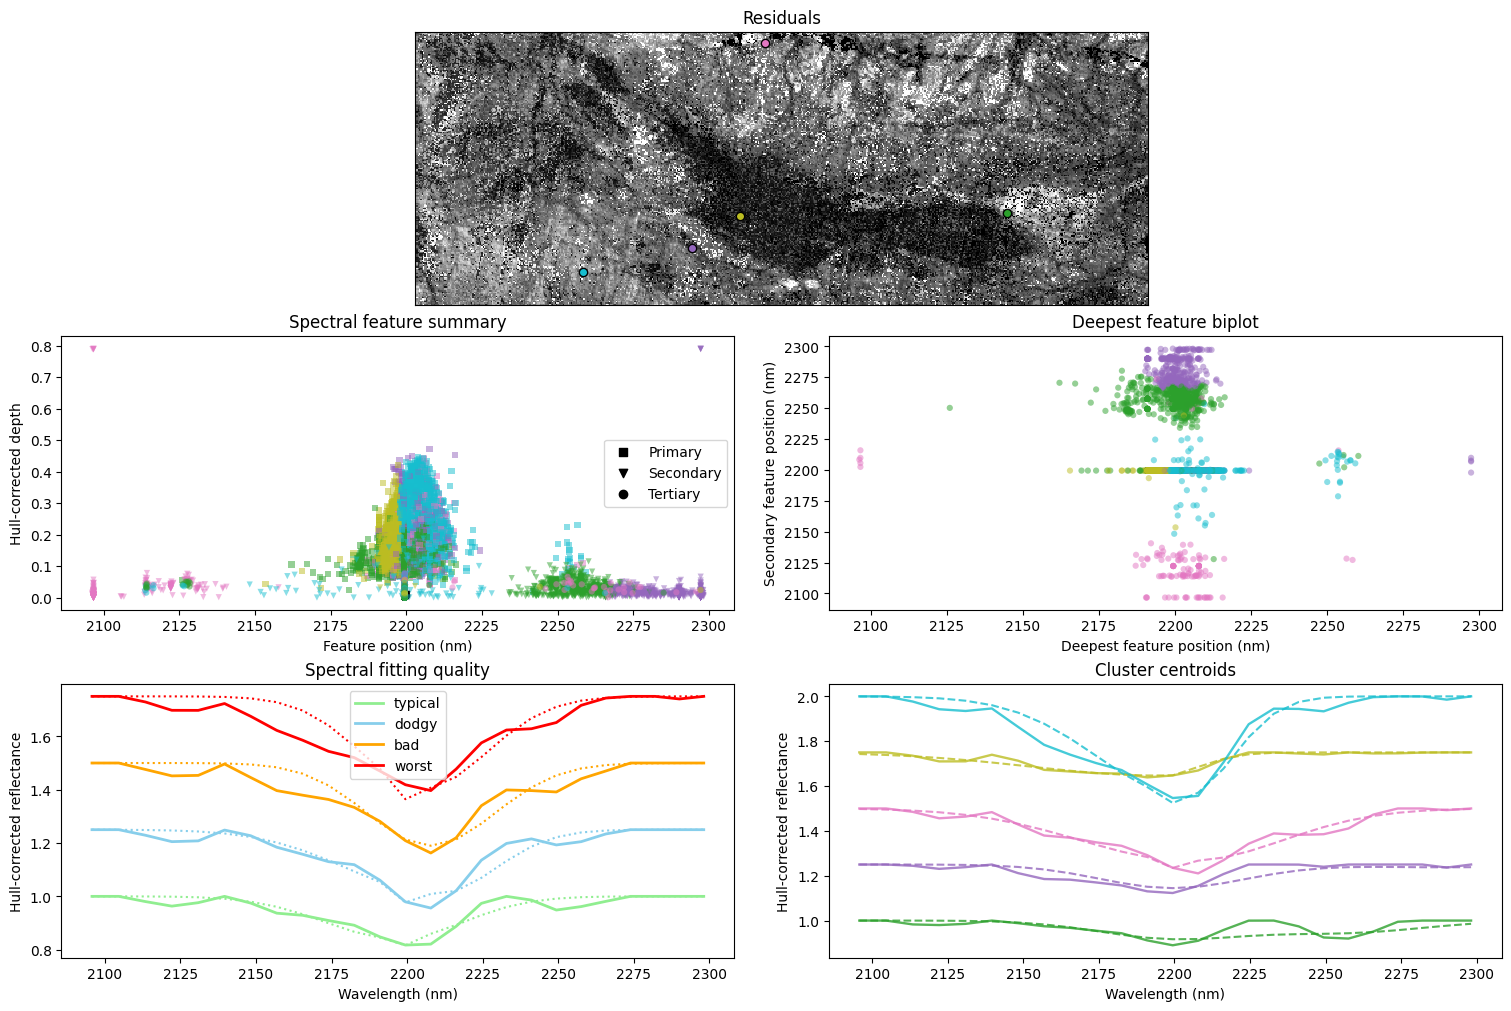

In [26]:
fig,ax = mwl.quick_plot(cam=image.header.get_camera(0))

As MWL objects contains a stack of multiple features for each spectra in the dataset. For example, the features can be sorted by depth or position, and specific feature attributes ('depth', 'pos', 'width', 'width1' or 'width2') extracted as follows:

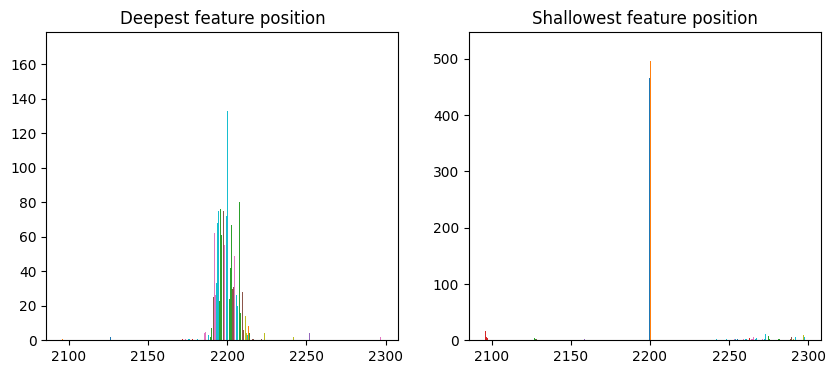

In [27]:
mwl.sortByDepth()
d = mwl[0, 'pos'] # this will be a numpy slice containing the position of the deepest feature
s = mwl[-1, 'pos'] # this will be a numpy slice containing the position of the shallowest feature
fig,ax = plt.subplots(1,2,figsize=(10,4))
ax[0].hist(d,bins=100)
ax[0].set_title("Deepest feature position")
ax[1].hist(s,bins=100)
ax[1].set_title("Shallowest feature position")
fig.show()

Plotting the precise position of the AlOH feature (located at ~2200 nm) can be a useful way of distinguishing the mineralogy of different clay and white mica minerals. This can be easily done using the MWL.closest(...) function

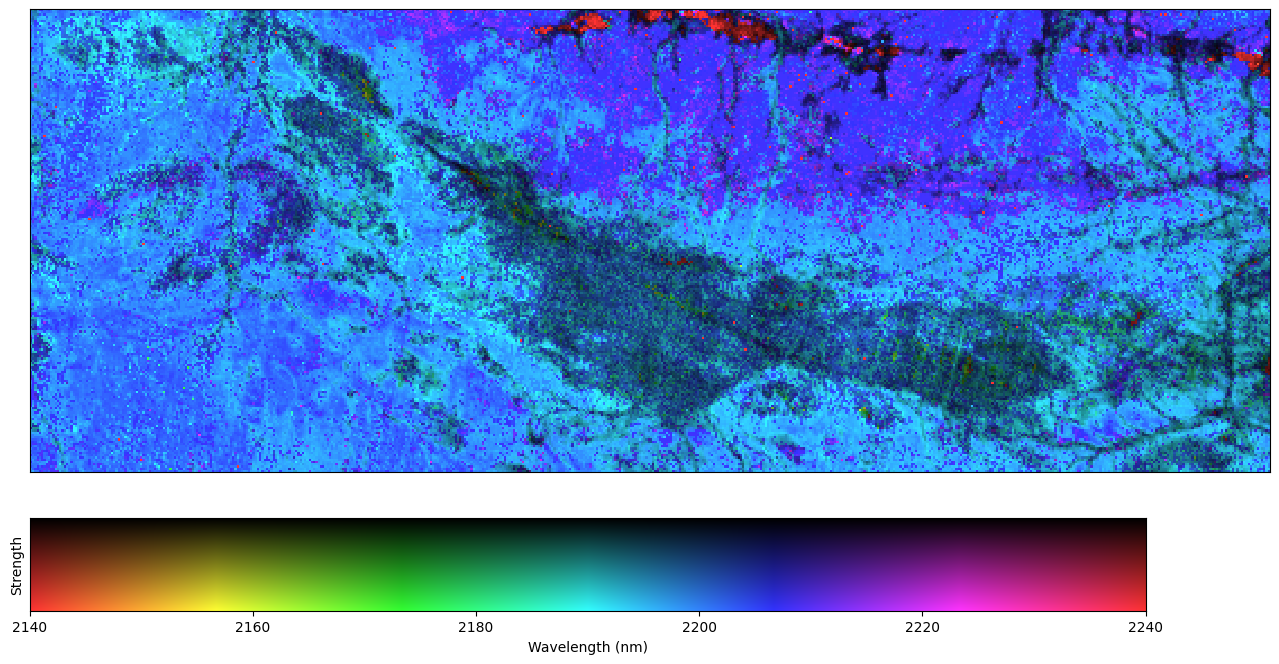

In [30]:
rgb, leg = colourise_mwl( mwl.deepest(wmin=2100., wmax=2300.), val_map=(0.01,0.2), hue_map=(2140., 2240.)) 
fig,ax = rgb.quick_plot( (0,1,2), vmin=0., vmax=1.,rot=False,figsize=(16,9) )
leg.plot(ax, pos=(0,-0.3), s=(0.9,0.2) ) # plot special colorbar
fig.show()

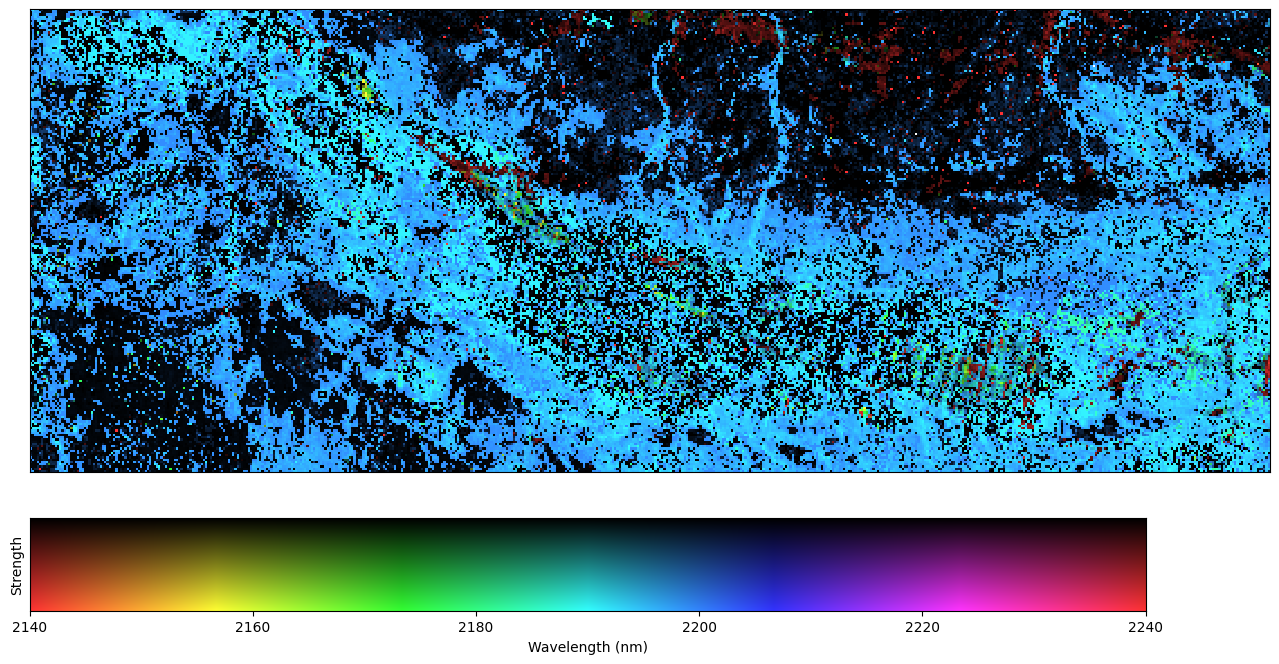

In [29]:
#AL-OH mapping
rgb, leg = colourise_mwl( mwl.closest(2200., valid_range=None, depth_cutoff=0.05),
                         val_map=(0.01,0.1),  # this controls the depth -> brightne
                         hue_map=(2140., 2240.)) # this controls the wavelength
fig,ax = rgb.quick_plot( (0,1,2), vmin=0., vmax=1.,rot=False,figsize=(16,9) )
leg.plot(ax, pos=(0,-0.3), s=(0.9,0.2) ) # plot special colorbar
fig.show()

Similarly, we can extract the n'th deepest feature and visualise it using the colourise_mwl function. This has a variety of visualisation options, but by default maps feature position to hue and feature depth to brightness.

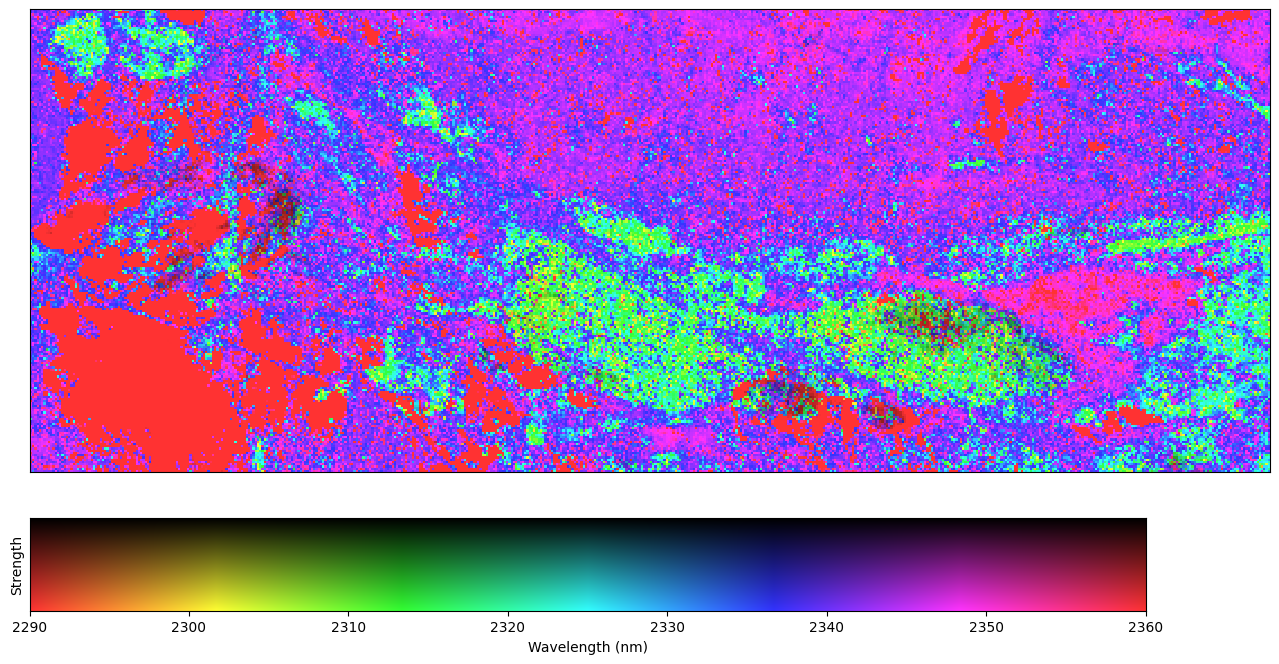

In [11]:
rgb, leg = colourise_mwl( mwl.deepest(wmin=2100., wmax=2400.), val_map=(0.01,0.2), hue_map=(2290., 2360.)) 
fig,ax = rgb.quick_plot( (0,1,2), vmin=0., vmax=1.,rot=False,figsize=(16,9) )
leg.plot(ax, pos=(0,-0.3), s=(0.9,0.2) ) # plot special colorbar
fig.show()